# Projet Semestriel: Prédiction des prix de Maisons.

In [1]:
from sklearn.ensemble import GradientBoostingRegressor
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize as opt
from matplotlib.animation import FuncAnimation,FFMpegFileWriter
import seaborn as sns
from ipywidgets import interact
import math 
import matplotlib.animation as animatio
from pandas_profiling import ProfileReport
from scipy.stats import spearmanr
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from scipy import stats
import time
from sklearn import svm,datasets,metrics,impute,preprocessing,model_selection,tree,linear_model,neural_network,decomposition

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
classe=df_train['SalePrice']
Id_test=df_test['Id']
df_train.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

# I. Exploration de données

In [3]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
profile = ProfileReport(df_train,minimal=True,title='Déscription Data',html={'style':{'full_width':True}})
#profile.to_notebook_iframe()

#### Nuage des données

In [5]:
column = ['SalePrice']
catégorie=df_train.select_dtypes(exclude="object")

def visu_distrib_selection_catégorie1(catégorie,column):
    plt.figure()
    sns.scatterplot(data=df_train, x=catégorie, y=column)

In [6]:
%matplotlib inline
interact(visu_distrib_selection_catégorie1,catégorie=catégorie,column=column)

interactive(children=(Dropdown(description='catégorie', options=('Id', 'MSSubClass', 'LotFrontage', 'LotArea',…

<function __main__.visu_distrib_selection_catégorie1(catégorie, column)>

#### Boxplots

In [7]:
column = ['SalePrice']
cat=df_train.select_dtypes(exclude="float64")
catégorie=cat.select_dtypes(exclude="int64")
def visu_distrib_selection(catégorie,column):
    plt.figure()
    #sns.scatter(x=catégorie, y=column, data=fichier3)
    sns.boxplot(data=df_train, x=catégorie, y=column)

In [8]:
interact(visu_distrib_selection,catégorie=catégorie,column=column)

interactive(children=(Dropdown(description='catégorie', options=('MSZoning', 'Street', 'Alley', 'LotShape', 'L…

<function __main__.visu_distrib_selection(catégorie, column)>

In [9]:
df_train.isnull().mean().sort_values(ascending=False)

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
ExterQual      0.000000
Exterior2nd    0.000000
Exterior1st    0.000000
RoofMatl       0.000000
SalePrice      0.000000
Length: 81, dtype: float64

#### COMMENTAIRE:

L'exploration de données nous a permis d'avoir un aperçu global du jeu de données et une connaissance detaillée de l'ensemble de variables.



Ce jeu de données comprends 1462 enregistrements et 81 colonnes ou variables dont       catégorielles.



La fonction intéractive 'visu_distrib_selection_catégorie1' nous permet de visuaiser la variable prix par raport à chaque autre variable afin d'en observer la corrélation.
Ainsi, sans calculer les différentes, corrélations, nous avons sû désceller les variables corrélées avec le prix(SalaPrice) et celles qui ne le sont pas.


De cette analyse ressort également les statistiques sur les données manquantes, les distributions de chaque variable ainsi que leurs déscriptions détaillées. Nous pouvons l'observer avec le module "profile" dont l'exécution est reprise ci-haut.

# II. Prétraitement

### II.1. Nettoyage des données



Ici il s'agit d'identifier les données manquantes et aberrantes afin de définir une stractégie de leur gestion

In [10]:
def imputation_man(df, val=None):
    df = df.drop(columns=['PoolQC', 'MiscFeature'], axis=1) # 1ère stractégie
    if val is None: 
        #mean_idx = (df.std() < df.mean()).index 
        #df.fillna(df[mean_idx].mean(),inplace=True) # 2ème stractégie
        df.fillna(df.mode().iloc[0],inplace=True) # 3ème stractégie
    else: df.fillna(val,inplace=True)
    return  df

def suppression_abe(df): 
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR))|(df > (Q3 + 1.5 * IQR))).any()]

In [11]:
df_train = imputation_man(df_train)
df_train.isnull().mean().sort_values(ascending=False)

Id             0.0
HalfBath       0.0
FireplaceQu    0.0
Fireplaces     0.0
Functional     0.0
              ... 
MasVnrType     0.0
Exterior2nd    0.0
Exterior1st    0.0
RoofMatl       0.0
SalePrice      0.0
Length: 79, dtype: float64

### II.2.Encodage et Normalisation
    
    
    
    
Ici les données catégorielles(ordinales et nominales) seront encodées et celles numériques seront mises à l'échelle

In [12]:
df_num = df_train.select_dtypes(include=[np.number]).columns.drop(['Id','SalePrice'])
df_cat = df_train.dtypes[df_train.dtypes == object].index
categoricalNominal = ['MSZoning', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'SaleType', 'SaleCondition']
categoricalOrdinal = list(set(df_cat.tolist()) - set(categoricalNominal))

lbe = preprocessing.OrdinalEncoder().fit(df_train[categoricalOrdinal])
ohe = preprocessing.OneHotEncoder(sparse=False).fit(df_train[categoricalNominal])
std = preprocessing.StandardScaler().fit(df_train[df_num])

df_train.dtypes.value_counts()

object     41
int64      35
float64     3
dtype: int64

In [13]:
def normalisation_num(df):
    df[df_num] = std.transform(df[df_num])
    return df #df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
def encodage_cat(df):    
    df[categoricalOrdinal] = lbe.transform(df[categoricalOrdinal])
    
    #col = pd.unique((np.array(categoricalNominal) + df[categoricalNominal].values).ravel('K'))
    df = df.join(pd.get_dummies(df[categoricalNominal], columns=categoricalNominal)) 
    #pd.DataFrame(ohe.transform(df[categoricalNominal]), columns=col)
    df.drop(columns=categoricalNominal, inplace=True)
    return df

yy = preprocessing.StandardScaler().fit(df_train[['SalePrice']])
df_train = normalisation_num(df_train)
df_train.shape

(1460, 79)

In [14]:
y = yy.transform(df_train[['SalePrice']])
df_train = df_train.drop(columns=['Id', 'SalePrice'], axis=1)
df_train = encodage_cat(df_train)


### II.3. Réduction de dimension



In [16]:
pca = decomposition.PCA(n_components=.99).fit(df_train)
train = pca.transform(df_train)
train.shape

(1460, 90)

<ipython-input-17-7c425f3adf25>:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


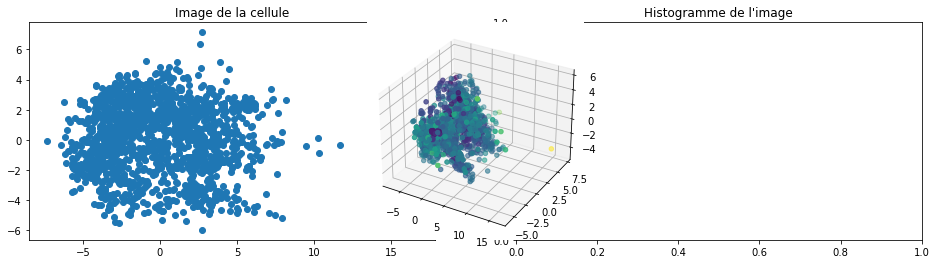

In [17]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#
ax1.set_title('Image de la cellule') 
#ax1=plt.axes(projection='2d')
ax1.scatter(train[:,0], train[:,1])

#
ax2.set_title("Histogramme de l'image")
ax2=f.gca(projection='3d')
ax2.scatter3D(train[:,0], train[:,1],train[:,2], c=train[:,3])
plt.show()

#axes(projection='3d').scatter3D(train[:,0], train[:,1],train[:,2], c=train[:,3]);



## Commentaire:

De l'analyse exploratoire découle quelques opérations de prétraitements. Celles-ci nous ont permis à préparer nos données afin d'améliorer l'apprentissage.


Elles consistent à remplir les données manquantes par les valeurs les plus fréquentes de la distribution, à éliminer les données abérrantes, à encoder les données qualitatives et à les normaliser avant d'effectuer l'analyse en composantes principales pour réduire la dimension de données.

# III. Apprentissage

##### Dans cette section, nous allons testé quelques modèle de regression afin de retenir le meilleur.

In [18]:
def tuning(model, params, maxiter=None, cv=5):
    grid = model_selection.GridSearchCV(model, params, n_jobs=-1, cv=cv) if maxiter is None else model_selection.RandomizedSearchCV(model, params, n_jobs=-1, cv=cv, n_iter=maxiter)
    grid.fit(x_train,y_train)
    #plt.plot(grid.cv_results_['mean_test_score'])
    return grid
#
def learning(model, samples=np.linspace(0.1, 1, 10), cv=5):
    n, train_score, valid_score = model_selection.learning_curve(model, x_train, y_train, train_sizes=samples, scoring="neg_root_mean_squared_error", cv=cv)    

    plt.plot(n,train_score.mean(axis=1),label='apprentissage_score')
    plt.plot(n,valid_score.mean(axis =1),label='validation_score')
    plt.legend()
    return model.fit(x_train,y_train)
#
def modelling_evaluation(model):
    model.fit(x_train,y_train)
    y_prediction = model.predict(x_test)
    #
    #print("Erreur Quadratique Moyenne {}".format(np.sqrt(metrics.mean_squared_error(y_test,y_prediction, squared =False))))
    return np.sqrt(metrics.mean_squared_error(y_test,y_prediction, squared =False))
#
def affiche_Prediction(model):
    y_prediction = model.predict(x_test)
    df = pd.DataFrame({'SalePrice_Train': yy.inverse_transform(y_test).ravel(), 'SalePrice_Prédit': yy.inverse_transform(y_prediction).ravel()})
    return df

In [19]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(train,y,test_size=.2, random_state=41)
pd.DataFrame(train).head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,2.825532,-0.581804,1.945833,-1.425322,0.189576,-0.896636,1.866339,-1.548516,-0.460867,-0.507703,...,0.029617,0.018912,-0.007965,0.072194,0.051679,0.009270,0.061856,0.062215,0.007814,-0.060664
1,0.583642,3.343511,-0.256346,0.183693,0.421565,-1.543319,1.677582,-0.373015,-0.051900,0.070036,...,0.111201,0.745196,0.536973,-0.120239,-0.056955,0.089759,-0.213444,0.248736,0.200492,0.120993
2,3.582655,-0.232247,1.936576,-0.770543,-0.468019,-1.815597,-0.304028,0.462065,-1.107162,0.021347,...,-0.043761,0.054149,-0.022867,0.079765,-0.017790,-0.038007,0.012395,0.009597,0.050392,-0.032344
3,-0.999487,0.031194,2.587898,1.693914,3.189388,-1.049364,-1.276825,0.476188,-0.765842,1.404883,...,-0.395157,0.146295,-0.296842,-0.163139,0.160158,0.217066,-0.480028,0.012755,-0.496144,0.396422
4,5.782758,-0.448543,1.895635,1.132143,0.224280,-0.970167,-0.756333,0.191240,-0.670746,0.575747,...,-0.059249,0.540096,0.332412,-0.065763,0.186470,-0.222802,-0.336818,-0.112055,0.511733,0.097862


## 1. LinearRegression

Temps d'exécution 0.2460777759552002


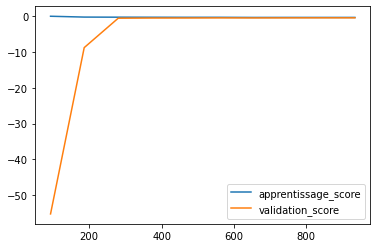

In [20]:
time1=time.time()
model=learning(linear_model.LinearRegression())
lrmodel=model.score(x_test,y_test)
timeLR=time.time()-time1
print("Temps d'exécution {}".format(timeLR))

In [21]:
print('Erreur quadratique Régression Linéaire {}'.format(modelling_evaluation(model)))

Erreur quadratique Régression Linéaire 0.5669877398934422


In [22]:
affiche_Prediction(model.fit(x_train,y_train))

,SalePrice_Train,SalePrice_Prédit
0,228950.0,243043.489359
1,194000.0,203988.408468
2,190000.0,207418.138004
3,159895.0,210801.638536
4,145900.0,154966.589408
...,...,...
287,290000.0,301465.464080
288,165000.0,162051.354608
289,127500.0,137666.231654
290,97000.0,74437.762560


C:\Users\ANICET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


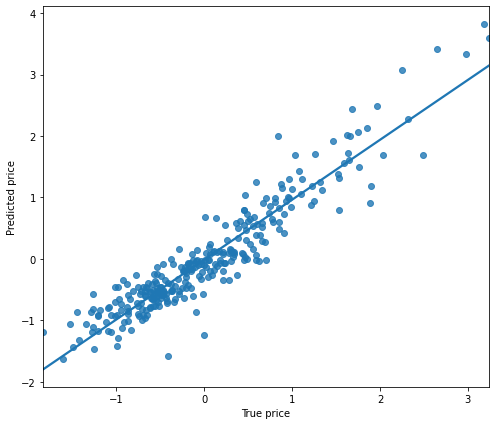

In [23]:
plt.figure(figsize=(8,7))
plt.xlabel('True price')
plt.ylabel('Predicted price')
sns.regplot(model.predict(x_test), y_test,order=1, ci=None)
plt.show()

## 2. SVR

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

Temps d'exécution 3.0689945220947266


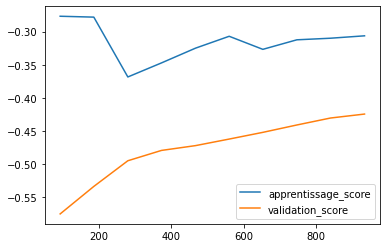

In [24]:
time2=time.time()
svr=learning(svm.SVR(kernel="rbf", gamma=.01))
svrmodel=svr.score(x_test,y_test)
timeSVR=time.time()-time2
print("Temps d'exécution {}".format(timeSVR))

In [25]:
print('Erreur quadratique SVR {}'.format(modelling_evaluation(svr)))

Erreur quadratique SVR 0.5396266122900132


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Recherche de meilleurs paramètres

In [26]:
svr_grid = tuning(svr, {"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)})
svr_grid.best_params_

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1.0, 'gamma': 0.01}

C:\Users\ANICET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


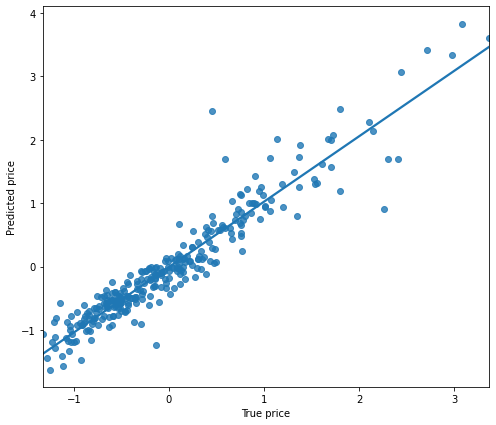

In [27]:
plt.figure(figsize=(8,7))
plt.xlabel('True price')
plt.ylabel('Predicted price')
sns.regplot(svr.predict(x_test), y_test,order=1, ci=None)
plt.show()

## 3.GradientBoostingRegressor

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Temps d'exécution 30.301934003829956


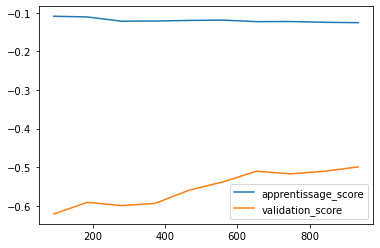

In [28]:
time3=time.time()
gbr = learning(GradientBoostingRegressor(n_estimators=20, min_samples_split=4, max_depth=50, random_state=0))
gbrmodel=gbr.score(x_test,y_test) 
timeGBR=time.time()-time3
print("Temps d'exécution {}".format((timeGBR)))

In [29]:
print('Erreur quadratique GBR {}'.format(modelling_evaluation(svr)))

Erreur quadratique GBR 0.5396266122900132


C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Recherche de meilleurs paramètres

In [30]:
gbr_grid = tuning(gbr, dict(max_depth=[50,100,200],learning_rate= [0.1, 0.2,0.3], loss = ['ls', 'lad','huber','quantile']),10,5)
gbr_grid.best_params_

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


{'max_depth': 100, 'loss': 'ls', 'learning_rate': 0.1}

C:\Users\ANICET\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


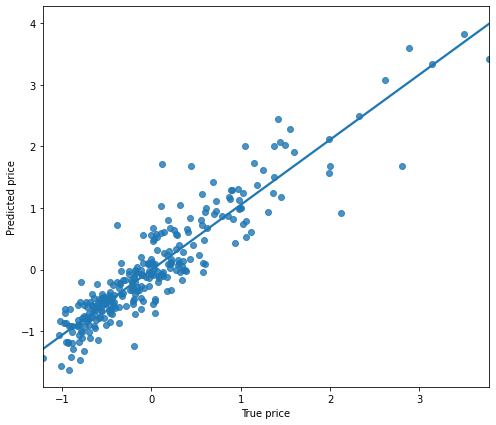

In [31]:
plt.figure(figsize=(8,7))
plt.xlabel('True price')
plt.ylabel('Predicted price')
sns.regplot(gbr.predict(x_test), y_test,order=1, ci=None)
plt.show()

## Comparaison de prix prédits par chaque classifieur

In [32]:
y_prediction1 = model.predict(x_test)
y_prediction2 = svr.predict(x_test).reshape(-1,1)
y_prediction3 = gbr.predict(x_test).reshape(-1,1)
#
dframe = pd.DataFrame({'SalePrice_Train': yy.inverse_transform(y_test).ravel(), 'SalePrice_LR': yy.inverse_transform(y_prediction1).ravel(),'SalePrice_SVR': yy.inverse_transform(y_prediction2).ravel(),'SalePrice_GBR': yy.inverse_transform(y_prediction3).ravel()})
dframe

,SalePrice_Train,SalePrice_LR,SalePrice_SVR,SalePrice_GBR
0,228950.0,243043.489359,232022.949799,269643.070763
1,194000.0,203988.408468,190295.282833,180110.362058
2,190000.0,207418.138004,192484.486898,198451.645275
3,159895.0,210801.638536,178469.994518,178483.086534
4,145900.0,154966.589408,182038.431072,137834.707731
...,...,...,...,...
287,290000.0,301465.464080,301878.902652,274937.955285
288,165000.0,162051.354608,157310.334379,144012.586518
289,127500.0,137666.231654,121987.647855,135655.035326
290,97000.0,74437.762560,100081.022248,98461.172393


In [33]:

dfram = pd.DataFrame({'Classifieur':['Regression Linéaire','SVR','GradientBoosting'] , 'Score obtenu':[lrmodel,svrmodel,gbrmodel],'Erreur':[modelling_evaluation(model),modelling_evaluation(svr),modelling_evaluation(gbr)],"Temps d'exécution":[timeLR,timeSVR,timeGBR] })
dfram

C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ANICET\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Classifieur,Score obtenu,Erreur,Temps d'exécution
0,Regression Linéaire,0.877792,0.566988,0.246078
1,SVR,0.899728,0.539627,3.068995
2,GradientBoosting,0.851170,0.595623,30.301934


# Choix du modèle 

En se basant sur le score obtenu, l'erreur, le temps d'exécution ainsi que les courbes d'apprentissage et de validation, nous avons pu opérer notre choix de modèle.


Malgré son temps d'exécution supérieur à la régression linéaire, le modèle SVR est celui pour lequel nous avons opté. Ce choix est non seulement dû à son score élevé mais aussi à la valeur de l'erreur trouvée. Nous nous sommes également appuyé sur la courbe d'apprentissage qui n'annule pas l'erreur mais la reduit progressivement et sensiblement. C'est dans cette même allure qu'évolue également la courbe de validation.


La séparation Linéaire quant à elle, a tendance à surapprendre. En observant la courbe, nous voyons que l'erreur s'annule. Ce modèle aura donc des difficultés à s'adapter à d'autres types de données car elle n'est pas bien généralisée.


Le rejet du modèle GradientBoostingRegression est dû d'abord à son erreur d'apprentissage qui est supérieure aux autres. Aussi,à cause de son temps d'exécution qui est nettement de loin plus grand que les deux autres. 

### Proposition Amélioration

En testant plusieurs modèles, nous avons compris l'importance des opérations de prétraitements. Celles-ci influencent beaucoup le modèle d'apprentissage.

C'est pourquoi, nous pensons que le modèle retenu pourrait s'améliorer en y appliquant d'autres opérations de prétraitement plus avancées telle que la sélection de modèles pour ne retenir que des variables qui présentent une forte corrélation avec le prix de maison à savoir "SalaPrice".

In [ ]:
Vu le taux d'erreur, le scores obtenu, le temps d'exécution, les courbes d'apprentissage et de validation obtenues, nous avons porté notre choix sur le modèle SVR.

# IV. Test

In [35]:
df_test = imputation_man(df_test)
df_test.isnull().mean().sort_values(ascending=False) 

Id               0.0
FullBath         0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
                ... 
MasVnrType       0.0
Exterior2nd      0.0
Exterior1st      0.0
RoofMatl         0.0
SaleCondition    0.0
Length: 78, dtype: float64

In [36]:
df_test = df_test.drop(columns=['Id'], axis=1)
df_test = normalisation_num(df_test)
df_test.shape

(1459, 77)

In [37]:
df_test = encodage_cat(df_test)
df_test.shape

(1459, 186)

In [38]:
pca = decomposition.PCA(n_components=.9905).fit(df_test)
test = pca.transform(df_test)
test.shape

(1459, 90)

<ipython-input-39-4921373cbe24>:9: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax2=f.gca(projection='3d')


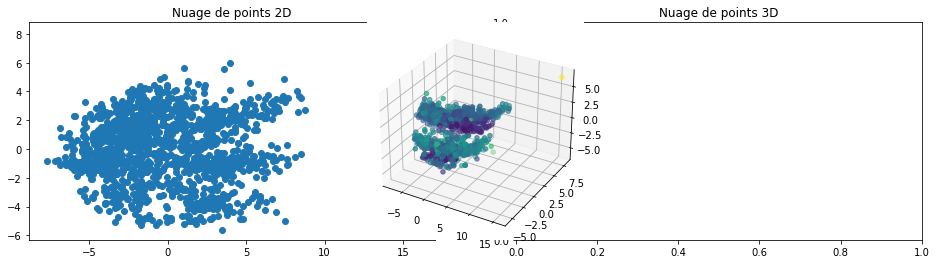

In [39]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
#
ax1.set_title('Nuage de points 2D') 
#ax1=plt.axes(projection='2d')
ax1.scatter(test[:,0], test[:,1])

#
ax2.set_title("Nuage de points 3D")
ax2=f.gca(projection='3d')
ax2.scatter3D(test[:,0], test[:,1],test[:,2], c=test[:,3])
plt.show()

### Affichage des prix prédits

In [40]:
rep=yy.inverse_transform(svr.predict(test).reshape(-1,1))
repd=pd.DataFrame({'Id':Id_test,'SalePrice':rep.ravel()})
repd.to_csv('PredictSVR.csv', sep=',', na_rep='NULL', index=False)
repd

,Id,SalePrice
0,1461,130701.466897
1,1462,206194.468128
2,1463,248146.987662
3,1464,266871.848208
4,1465,184402.824965
...,...,...
1454,2915,109668.965533
1455,2916,101338.351133
1456,2917,199110.052957
1457,2918,178574.579729
